In [1]:
import os
import sys
import glob
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline
%precision 4
plt.style.use('ggplot')
np.random.seed(1234)
import pystan
import scipy.stats as stats

In [3]:
# binomial

coin_code = """
data {
    int<lower=0> n; // number of tosses
    int<lower=0> y; // number of heads
}
transformed data {}
parameters {
    real<lower=0, upper=1> p;
}
transformed parameters {}
model {
    p ~ beta(1, 1);
    y ~ binomial(n, p);
}
generated quantities {}
"""

coin_dat = {
             'n': 100,
             'y': 61,
            }

fit = pystan.stan(model_code=coin_code, data=coin_dat, iter=1000, chains=1)
print(fit)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_a743cb5b504d23a0269b657d19a83b98 NOW.


Inference for Stan model: anon_model_a743cb5b504d23a0269b657d19a83b98.
1 chains, each with iter=1000; warmup=500; thin=1; 
post-warmup draws per chain=500, total post-warmup draws=500.

       mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
p      0.61  2.8e-3   0.04   0.52   0.58    0.6   0.64    0.7  253.0    1.0
lp__ -68.74    0.04   0.64 -70.49 -68.81 -68.51 -68.35 -68.31  278.0    1.0

Samples were drawn using NUTS at Fri Apr 28 22:00:47 2017.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).


INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_8c40b2da36ef10b4cb1442acaa8b27b0 NOW.


Inference for Stan model: anon_model_8c40b2da36ef10b4cb1442acaa8b27b0.
1 chains, each with iter=1000; warmup=500; thin=1; 
post-warmup draws per chain=500, total post-warmup draws=500.

         mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
a        5.65    0.11   1.22   2.98   4.99   5.68   6.45   7.85  129.0   1.02
b        2.12    0.06   0.73    0.7   1.66   2.11   2.51   3.62  165.0   1.01
sigma    1.35    0.03   0.35   0.87   1.11   1.27   1.56   2.24  123.0    1.0
mu[0]    2.12    0.06   0.73    0.7   1.66   2.11   2.51   3.62  165.0   1.01
mu[1]    2.69    0.05   0.63   1.48    2.3   2.66   3.02    4.0  179.0   1.01
mu[2]    3.26    0.04   0.55   2.16   2.93   3.24   3.56   4.39  205.0    1.0
mu[3]    3.82    0.03   0.47   2.85   3.54    3.8    4.1   4.81  259.0    1.0
mu[4]    4.39    0.02   0.43   3.52   4.12   4.39   4.64    5.3  369.0    1.0
mu[5]    4.95    0.02   0.41   4.15   4.69   4.96    5.2   5.82  500.0    1.0
mu[6]    5.52    0.02   0.43   4.6

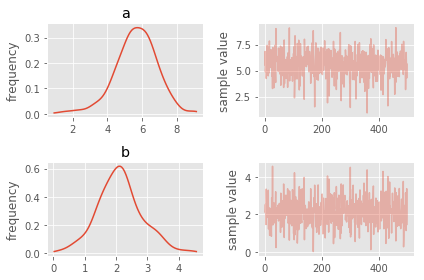

In [20]:
# linear regression

lin_reg_code = """
data {
    int<lower=0> n;
    real x[n];
    real y[n];
}
transformed data {}
parameters {
    real a;
    real b;
    real sigma;
}
transformed parameters {
    real mu[n];
    for (i in 1:n) {
        mu[i] <- a*x[i] + b;
        }
}
model {
    a ~ uniform(0, 10);
    sigma ~ uniform(0, 20);
    y ~ normal(mu, sigma);
}
generated quantities {}
"""

n = 11
_a = 6
_b = 2
x = np.linspace(0, 1, n)
y = _a*x + _b + np.random.randn(n)

lin_reg_dat = {
             'n': n,
             'x': x,
             'y': y
            }

fit = pystan.stan(model_code=lin_reg_code, data=lin_reg_dat, iter=1000, chains=1)
print fit
fit.plot(['a', 'b']);
plt.tight_layout()

In [6]:
# logistic regression
# observed data
df = pd.read_csv('HtWt.csv')
df.head()

,male,height,weight
0,0,63.2,168.7
1,0,68.7,169.8
2,0,64.8,176.6
3,0,67.9,246.8
4,1,68.9,151.6


In [18]:
df.male

0     0
1     0
2     0
3     0
4     1
5     1
6     1
7     0
8     1
9     0
10    1
11    1
12    1
13    1
14    1
15    1
16    0
17    1
18    0
19    1
20    0
21    1
22    0
23    1
24    0
25    1
26    0
27    1
28    0
29    0
     ..
40    0
41    0
42    0
43    1
44    0
45    0
46    0
47    1
48    0
49    1
50    1
51    0
52    1
53    1
54    0
55    1
56    1
57    0
58    1
59    0
60    1
61    1
62    0
63    0
64    1
65    0
66    1
67    0
68    0
69    1
Name: male, dtype: int64

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_1d884862dfc8cc07454a0c3bd709994b NOW.


Inference for Stan model: anon_model_1d884862dfc8cc07454a0c3bd709994b.
1 chains, each with iter=2000; warmup=1000; thin=1; 
post-warmup draws per chain=1000, total post-warmup draws=1000.

       mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
a      0.01  5.2e-4 9.4e-3-7.2e-3 3.4e-3 9.9e-3   0.02   0.03  334.0    1.0
b      0.39  4.9e-3   0.08   0.23   0.33   0.39   0.44   0.56  290.0    1.0
c    -27.47    0.32   5.39 -38.52 -30.81 -27.57 -23.75 -17.43  285.0    1.0
lp__ -35.24    0.07   1.18 -38.16 -35.77 -34.92 -34.39 -33.89  316.0    1.0

Samples were drawn using NUTS at Fri Apr 28 22:17:40 2017.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).


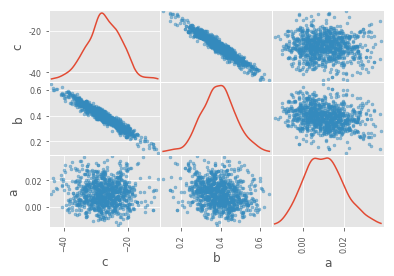

In [7]:
log_reg_code = """
data {
    int<lower=0> n;
    int male[n];
    real weight[n];
    real height[n];
}
transformed data {}
parameters {
    real a;
    real b;
    real c;
}
transformed parameters {}
model {
    a ~ normal(0, 10);
    b ~ normal(0, 10);
    c ~ normal(0, 10);
    for(i in 1:n) {
        male[i] ~ bernoulli(inv_logit(a*weight[i] + b*height[i] + c));
  }
}
generated quantities {}
"""

log_reg_dat = {
             'n': len(df),
             'male': df.male,
             'height': df.height,
             'weight': df.weight
            }

fit = pystan.stan(model_code=log_reg_code, data=log_reg_dat, iter=2000, chains=1)
print fit
df_trace = pd.DataFrame(fit.extract(['c', 'b', 'a']))
pd.scatter_matrix(df_trace[:], diagonal='kde');